In [1]:
import pandas as pd
import numpy as np
from scipy.stats import mannwhitneyu
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import itertools
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Load data
df = pd.read_csv('generated_dataset/behaviours_df.csv')
IDs = ["BRAC7159.2d", "BRAC7172.1e", "BRAC7172.1g", "BRAC7172.1h", "BRAC7266.1i", "BRYD63.4c", "BRYD65.4f", "BRYA125.3i", "BRYB121.3g", "BRYC103.3f"]
times = ["baseline", "day1", "day2", "day3", "day4", "day5", "day6", 
         "day10", "day14", "day18", "day22", "day26", "day30", "day50"]

In [4]:
# format dataframe 
comb_prob = pd.DataFrame()
comb = []

# Create combinations of sequential time points
for i, j in enumerate(times[1:]):
    comb.append([times[i], times[1:][i]])


for behaviour in ['retrieval to nest', 'aborted retrieval', 'overall retrieval']:
    for c in comb:
        try:
            df_comb = df[df.time.isin(c)]
            df_comb = df_comb[df_comb.behaviour == behaviour]
            df_comb['event'] = np.where(df_comb['latency'] < 900, 1, 0) # create event column
            ids =  df_comb[(df_comb['time'] == c[0]) & (df_comb['event'] == 1)]['ID'] # get ids for the first time point of the combination in the event of a retrieval
            df_time = df_comb[(df_comb['time'] == c[1]) & (df_comb['ID'].isin(ids))] # get ids for the second time point of the combination in the event of a retrieval
            conditional_prob = len(df_time[df_time['event'] == 1])/len(df_time) # calculate conditional probability
            df_conditional_prob = pd.DataFrame({'behaviour': behaviour, 'time': str(c), 'conditional_prob': conditional_prob}, index=[0]) # format final dataframe
            comb_prob = comb_prob.append(df_conditional_prob) # append to final dataframe
            
        except ZeroDivisionError:
            continue
      

/var/folders/4g/5slcnh6x71lgn2r91zbk1pwr0000gn/T/ipykernel_82381/315076671.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comb_prob = comb_prob.append(df_conditional_prob) # append to final dataframe
/var/folders/4g/5slcnh6x71lgn2r91zbk1pwr0000gn/T/ipykernel_82381/315076671.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comb_prob = comb_prob.append(df_conditional_prob) # append to final dataframe
/var/folders/4g/5slcnh6x71lgn2r91zbk1pwr0000gn/T/ipykernel_82381/315076671.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comb_prob = comb_prob.append(df_conditional_prob) # append to final dataframe
/var/folders/4g/5slcnh6x71lgn2r91zbk1pwr0000gn/T/ipykernel_82381/315076671.py:20: FutureWarning: The frame.append m

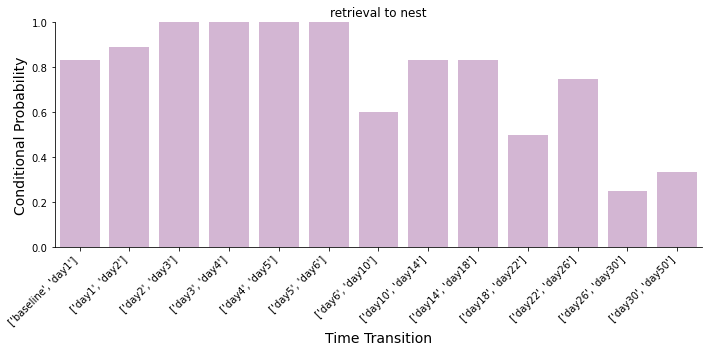

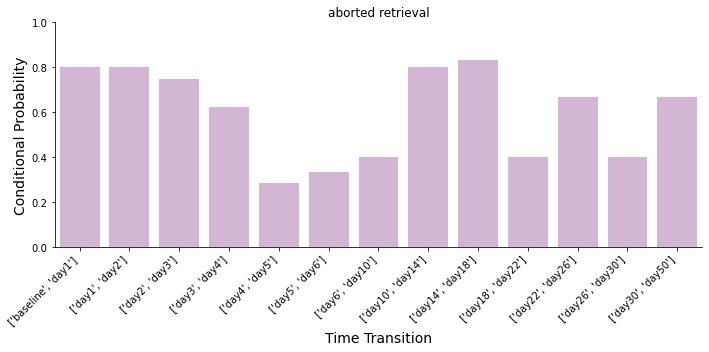

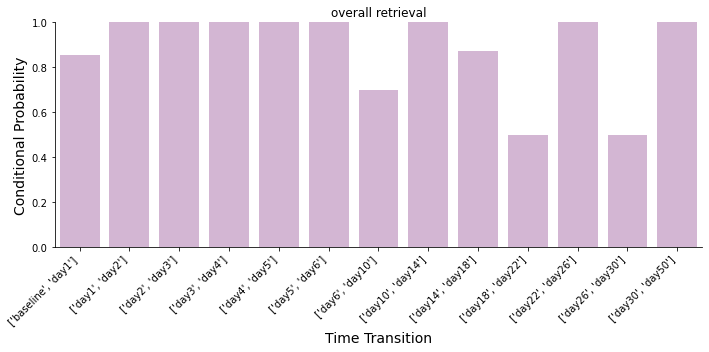

In [5]:
# Plot conditional probability
for behaviour in comb_prob.behaviour.unique():
    fig, ax = plt.subplots(figsize=(10, 5))
    
    # Plot the data
    sns.barplot(x="time", y="conditional_prob", 
                data=comb_prob[comb_prob.behaviour == behaviour], 
                color="purple", alpha=0.3)
    
    # Formatting
    ax.set_ylim([0, 1])
    ax.set_ylabel('Conditional Probability', fontsize=14)
    ax.set_xlabel('Time Transition', fontsize=14)
    ax.set_title(behaviour)
    
    # Improve x-tick labels
    plt.xticks(rotation=45, ha='right')
    
    # Clean up plot
    sns.despine()
    plt.tight_layout()
    
    # Save and display
    # plt.savefig(f'plots/{behaviour}_conditional_probability.jpg', dpi=300, bbox_inches='tight')
    plt.show()

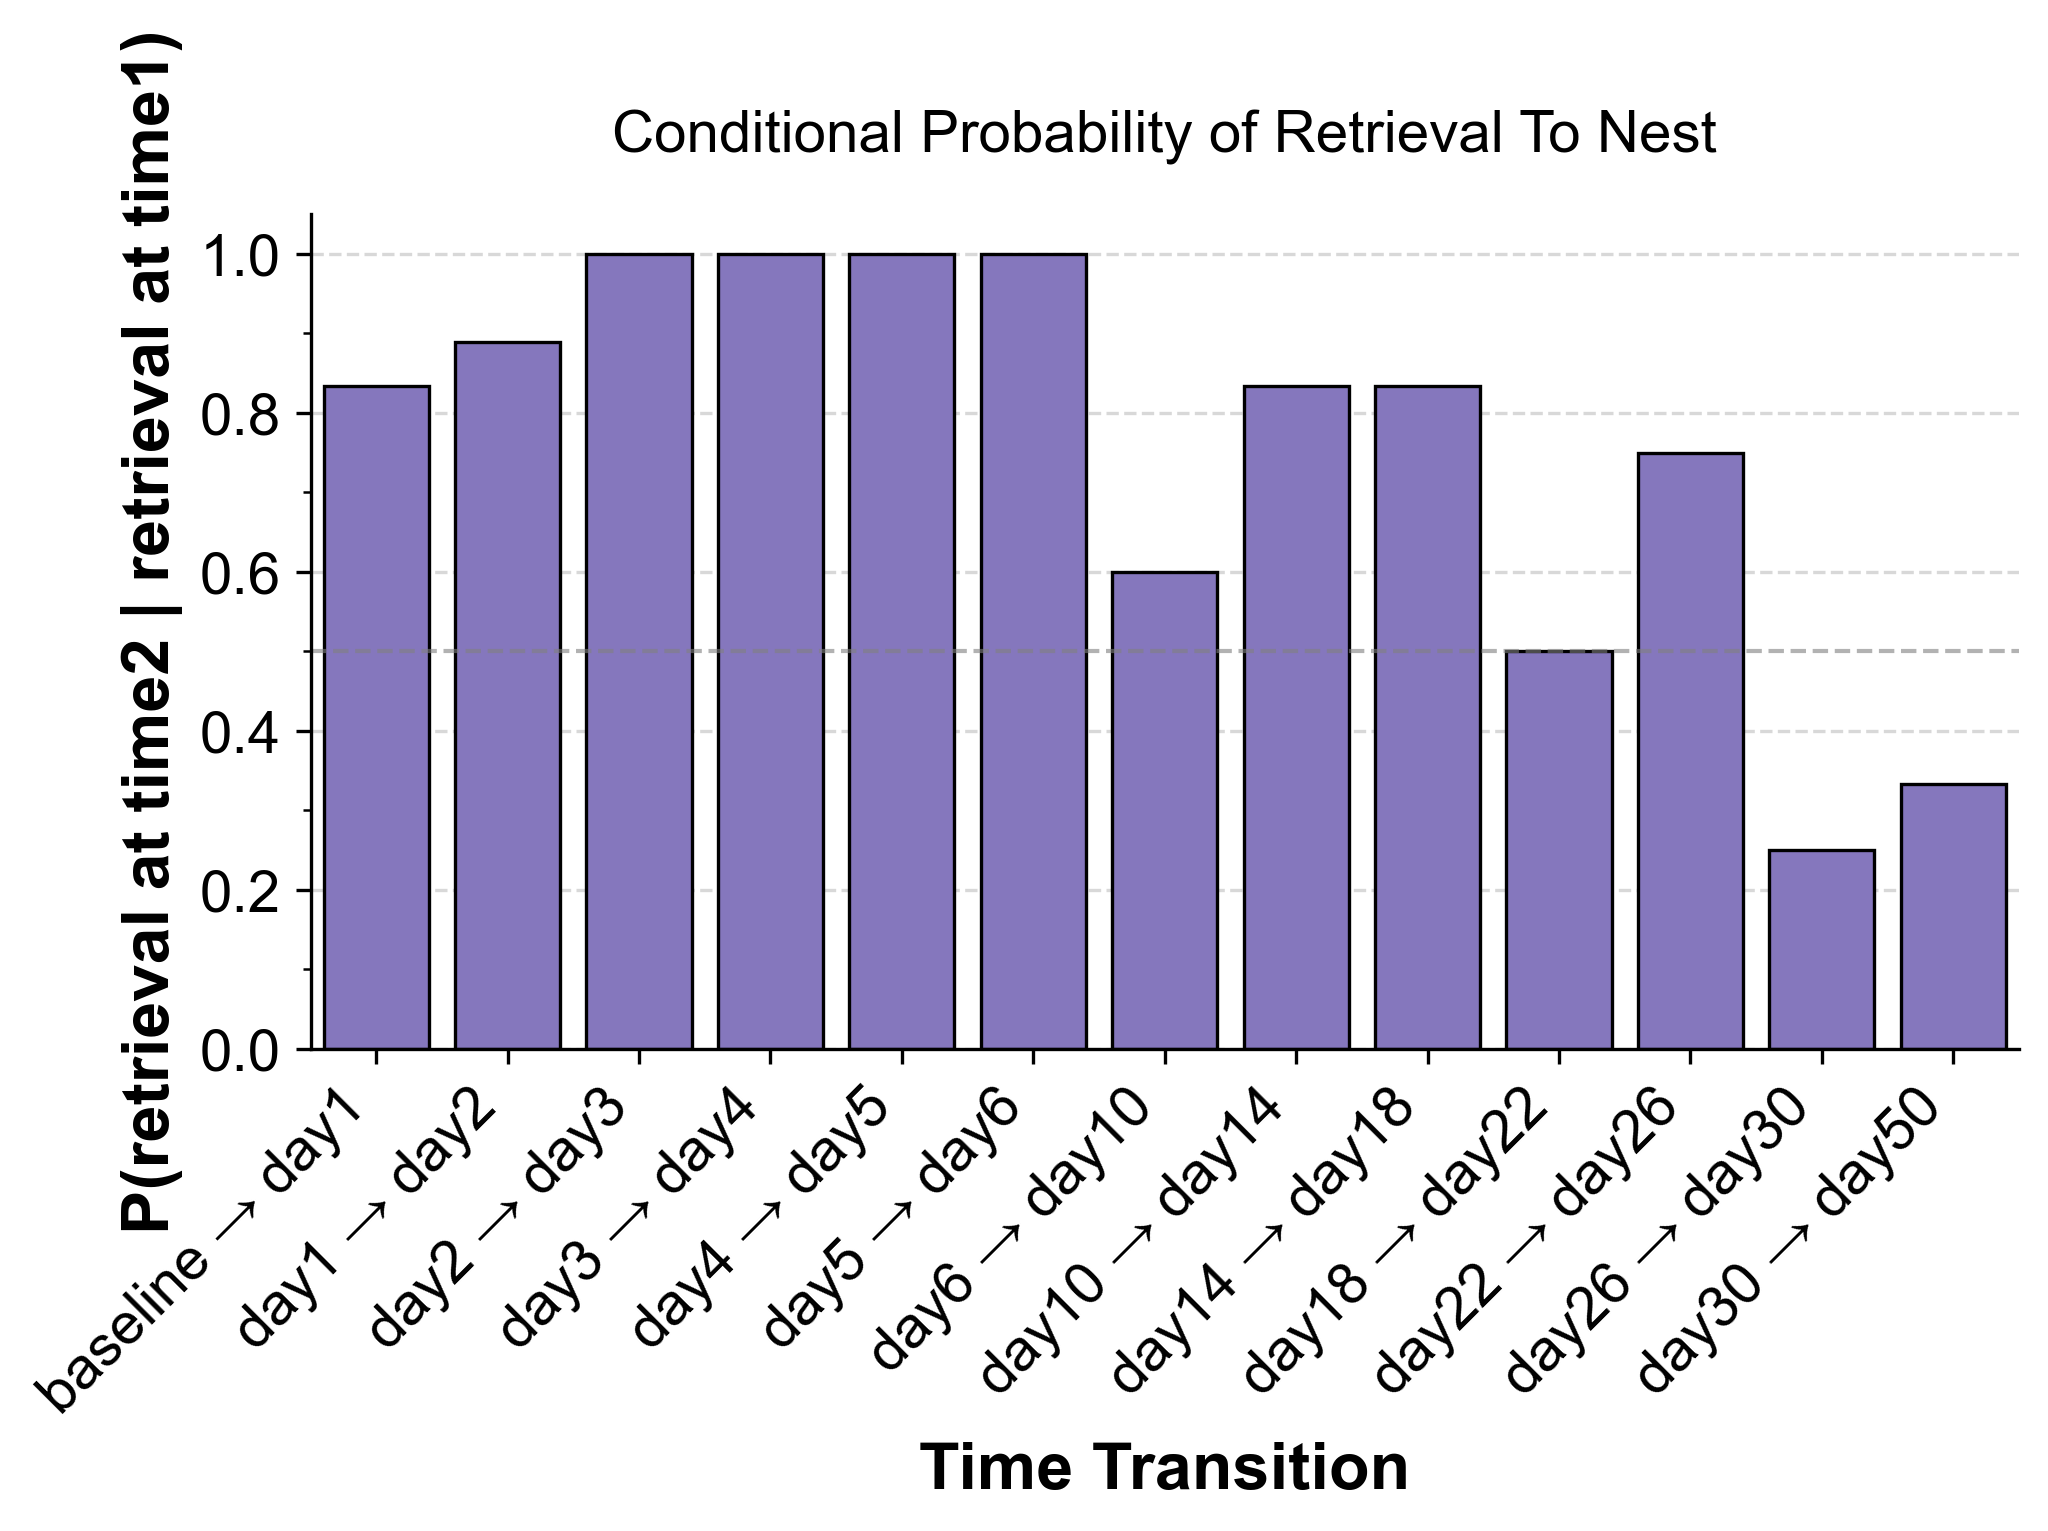

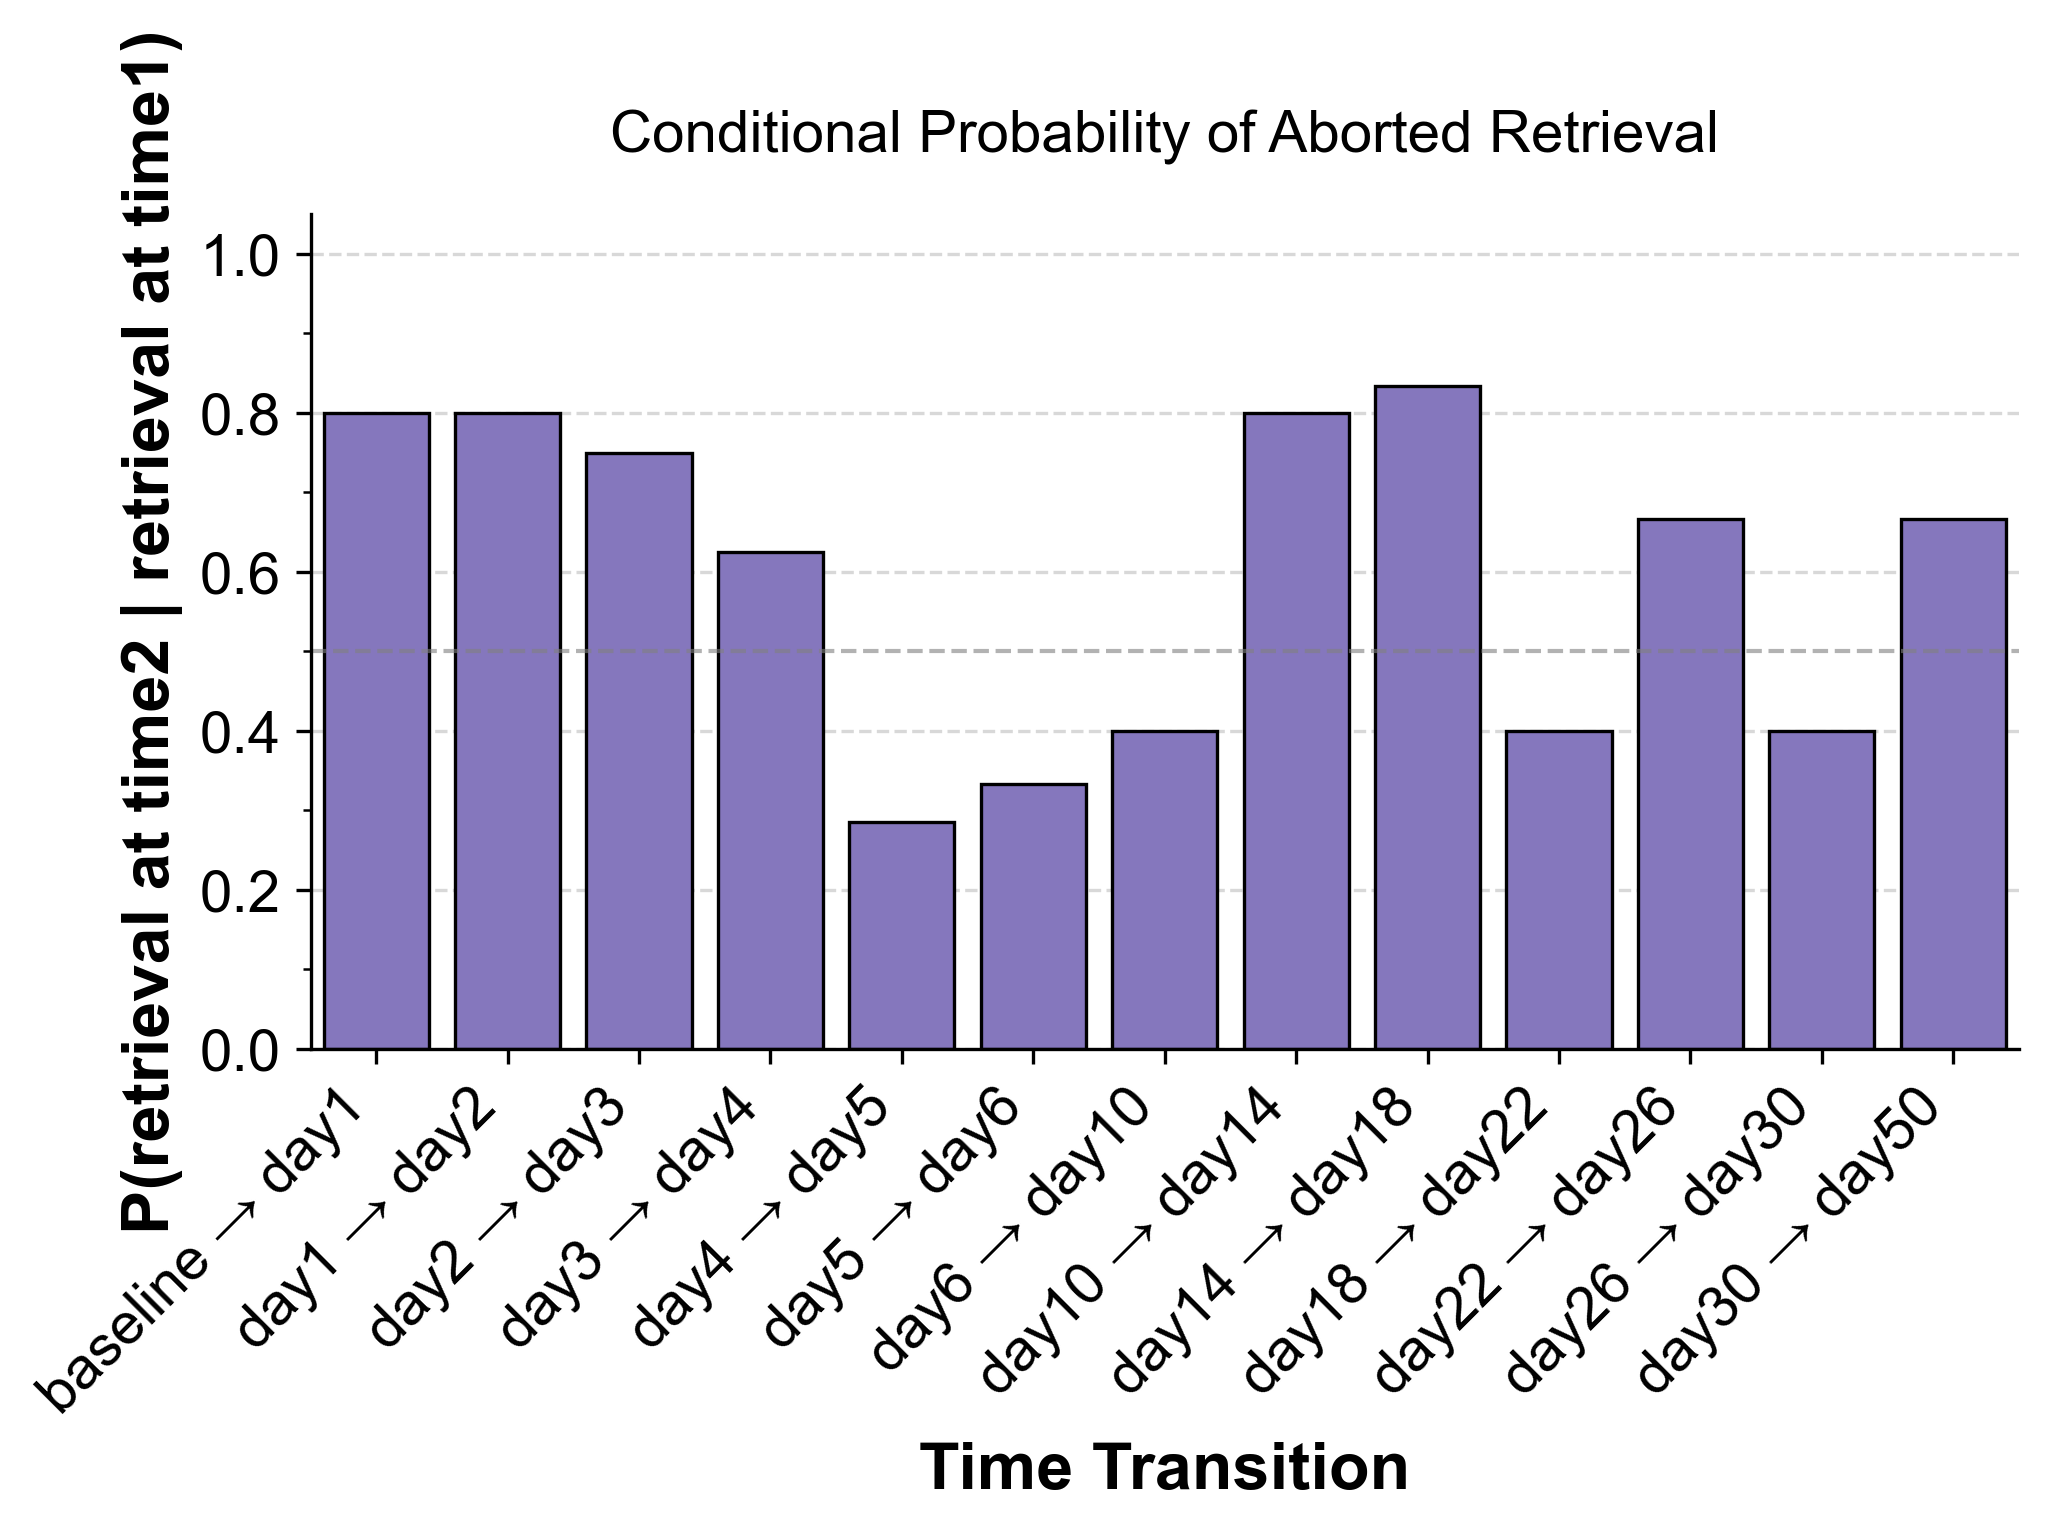

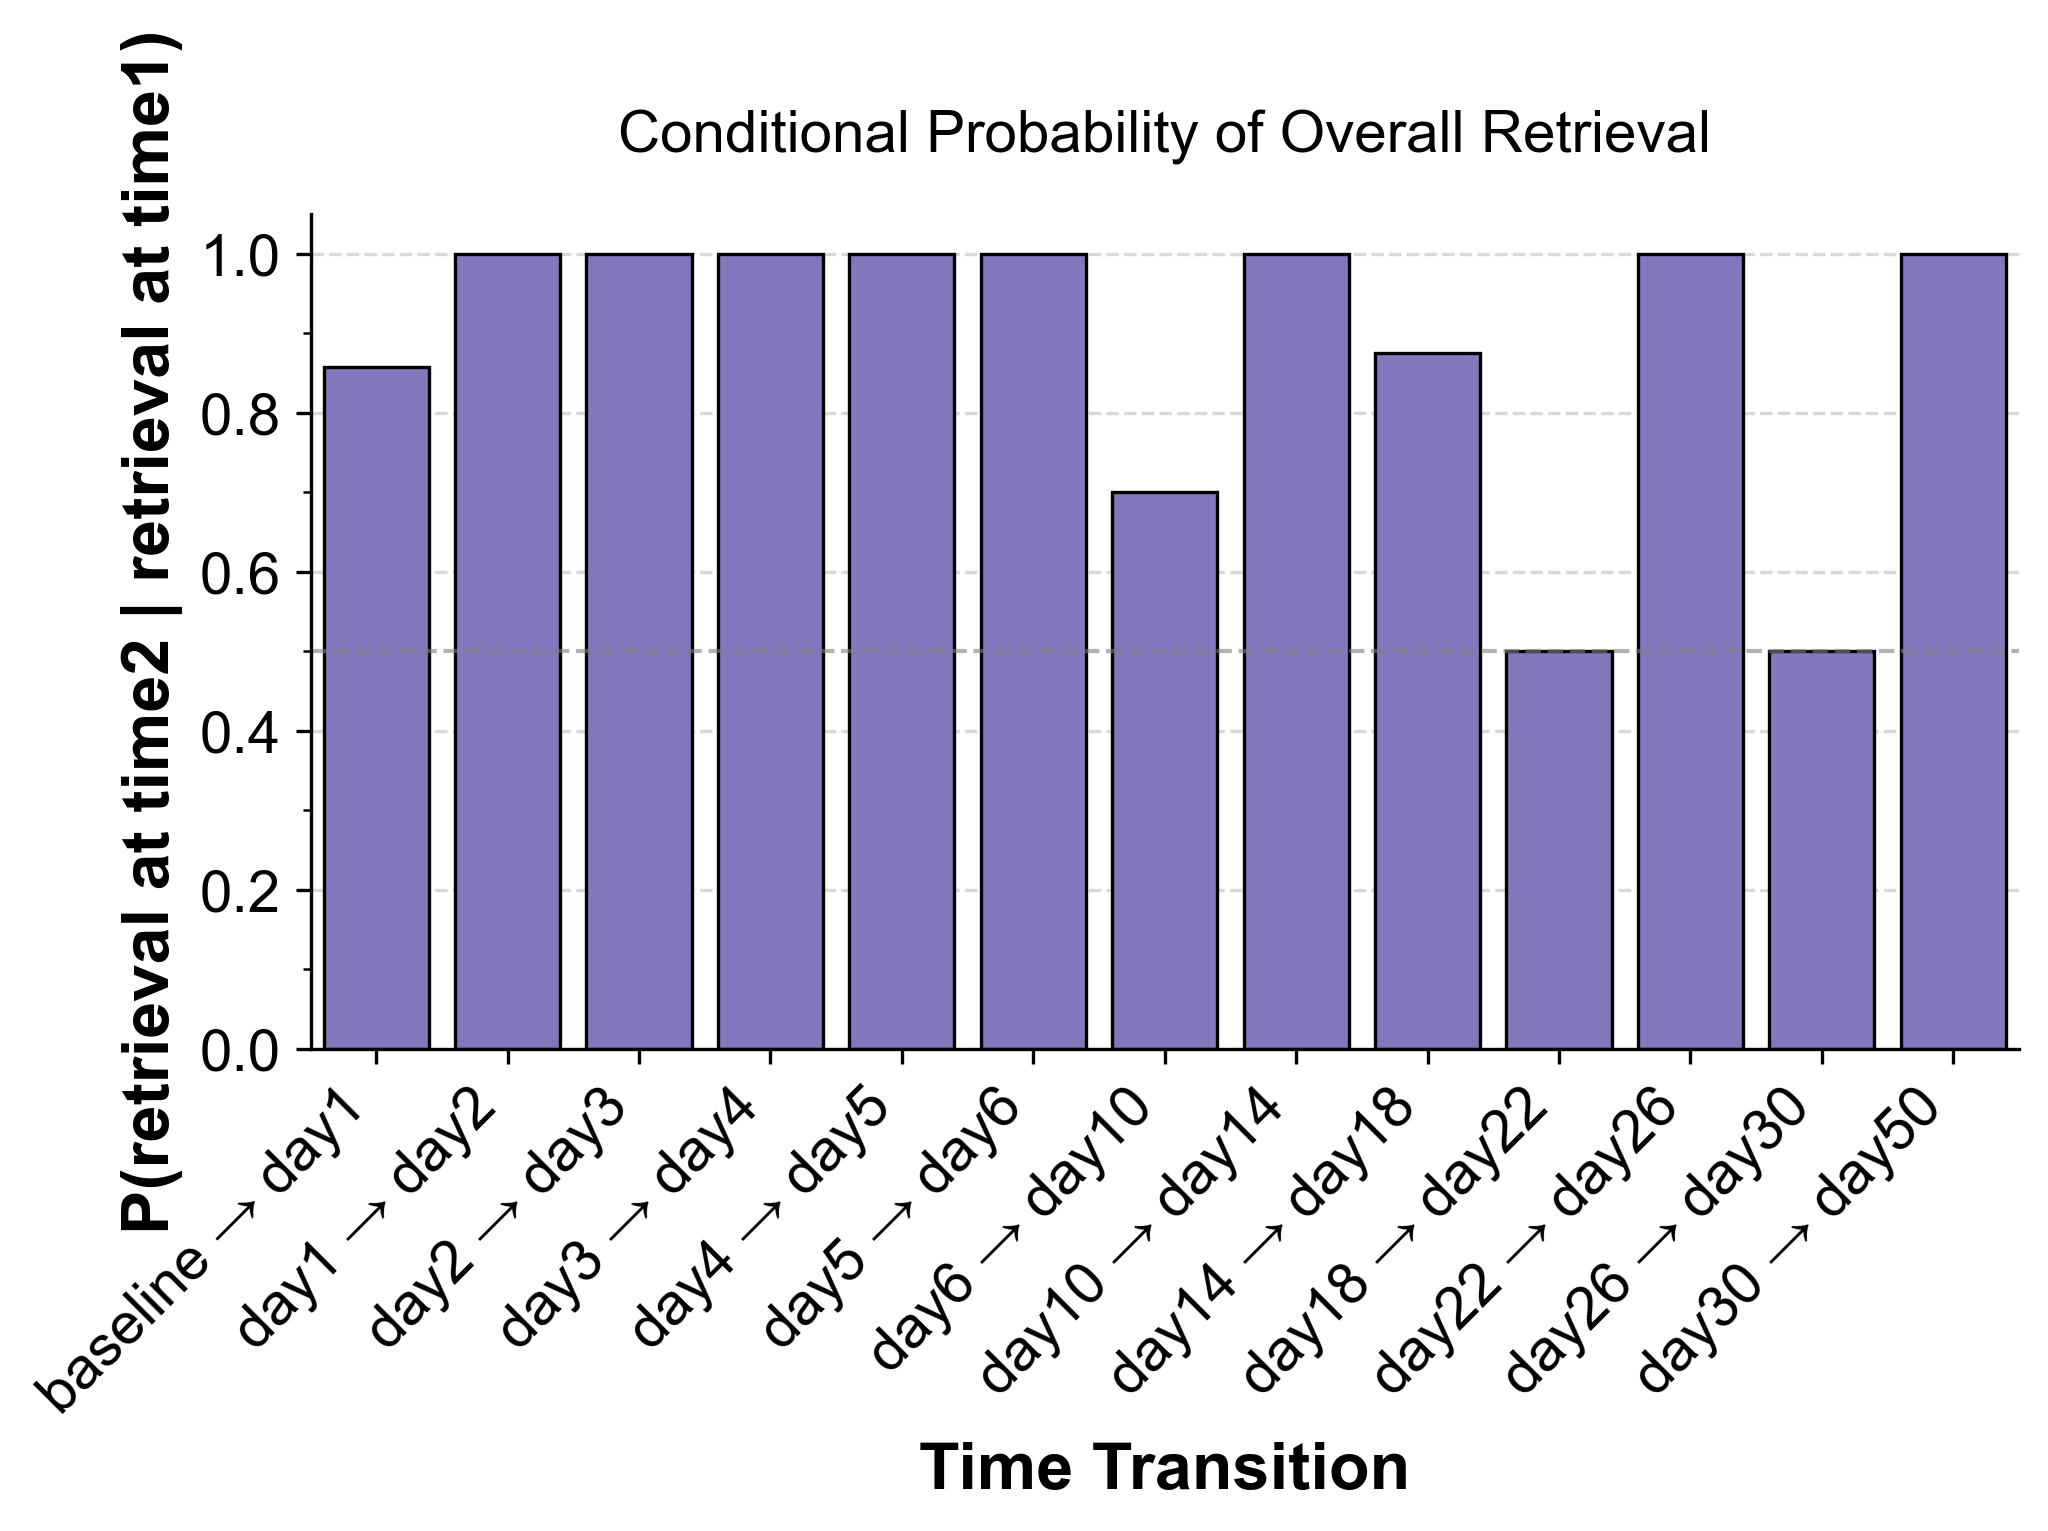

In [14]:
# Plot conditional probability - Publication ready for PhD thesis
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np
from matplotlib.ticker import MultipleLocator

# Set global font settings for consistency
plt.rcParams.update({
    'font.family': 'Arial',  # Standard font for publications
    'font.size': 12,
    'axes.titlesize': 14,
    'axes.labelsize': 14,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 12,
    'figure.dpi': 300
})

# Function to format time transition labels nicely
def format_time_transition(transition_str):
    # Extract time points from string representation of list
    match = re.search(r'\[(.*?)\]', transition_str)
    if match:
        times = match.group(1).replace("'", "").split(", ")
        return f"{times[0]} → {times[1]}"
    return transition_str

for behaviour in comb_prob.behaviour.unique():
    # Create figure with appropriate dimensions - reduced overall size
    fig, ax = plt.subplots(figsize=(7, 5))  # Reduced from (10, 7)
    
    # Get data for this behavior
    data = comb_prob[comb_prob.behaviour == behaviour].copy()
    
    # Format the time labels for better readability
    data['formatted_time'] = data['time'].apply(format_time_transition)
    
    # Plot with professional styling
    bars = sns.barplot(x="formatted_time", y="conditional_prob", 
              data=data, 
              color="#7E6BC9",  # More vibrant purple that prints well
              edgecolor='black', 
              linewidth=0.8,
              ax=ax)
    
    # Add horizontal reference line at 0.5
    ax.axhline(y=0.5, color='gray', linestyle='--', alpha=0.6, linewidth=1)
    
    # Formatting
    ax.set_ylim([0, 1.05])
    ax.yaxis.set_major_locator(MultipleLocator(0.2))
    ax.yaxis.set_minor_locator(MultipleLocator(0.1))
    
    # Add subtle grid lines
    ax.yaxis.grid(True, linestyle='--', alpha=0.3, color='gray')
    ax.set_axisbelow(True)
    
    # Format axis labels with new y-label text and increased font sizes
    ax.set_ylabel('P(retrieval at time2 | retrieval at time1)', fontweight='bold', fontsize=16)
    ax.set_xlabel('Time Transition', fontweight='bold', fontsize=16)
    
    # Increase tick label font sizes
    ax.tick_params(axis='both', which='major', labelsize=14)
    
    # Format title
    behavior_title = behaviour.replace('_', ' ').title()
    ax.set_title(f'Conditional Probability of {behavior_title}', pad=15)
    
    # Improve x-tick appearance with larger font size
    plt.xticks(rotation=45, ha='right')
    
    # Remove unnecessary spines
    sns.despine()
    
    # Tighten layout and ensure proper spacing
    plt.tight_layout()
    
    # Save in publication-quality formats
    plt.savefig(f'plots/{behaviour}_conditional_probability.png', dpi=600, bbox_inches='tight')
    
    plt.show()

In [6]:
# Identify retrievers and non-retrievers at day50 and calculate what is the earliest time point at which they retrieve
df = pd.read_csv('generated_dataset/behaviours_df.csv')
df_day50 = df[df.time == 'day50']
df_day50 = df_day50[df_day50.behaviour == 'retrieval to nest']
ids_retrievers =  df_day50[df_day50['latency'] < 900]['ID'].unique()


ids_non_retrievers =  df_day50[df_day50['latency'] >= 900]['ID'].unique()


# calculate the earliest timepoint at which they retrieve
df_retrievers = df_day50[df_day50.ID.isin(ids_retrievers)]
df_non_retrievers = df_day50[df_day50.ID.isin(ids_non_retrievers)]

df_earliest_retrieval = pd.DataFrame()
for l in [ids_retrievers, ids_non_retrievers]:
    for id in l:
        df_IDs = df[(df.ID == id) & (df.behaviour == 'retrieval to nest')]
        df_IDs.time = pd.Categorical(df_IDs.time, times)
        df_IDs = df_IDs.sort_values('time')
        earliest_retrieval = df_IDs[df_IDs['latency'] < 900].reset_index(drop = True).iloc[0]['time']
        earliest_retrieval_latency = df_IDs[df_IDs['latency'] < 900].reset_index(drop = True).iloc[0]['latency']
        df_earliest_retrieval = df_earliest_retrieval.append(pd.DataFrame({'ID': id, 'earliest_retrieval': earliest_retrieval, 'latency': earliest_retrieval_latency}, index=[0]))
        df_earliest_retrieval['Retrievers at day50'] = np.where(df_earliest_retrieval['ID'].isin(ids_retrievers), 'retriever', 'non retriever')
print(df_earliest_retrieval)


            ID earliest_retrieval  latency Retrievers at day50
0  BRAC7172.1g           baseline  283.766           retriever
0  BRAC7172.1h               day1  311.080           retriever
0  BRAC7266.1i               day1   89.605           retriever
0  BRAC7159.2d           baseline  337.974       non retriever
0  BRAC7172.1e           baseline  628.090       non retriever
0    BRYD63.4c               day1   83.166       non retriever
0   BRYA125.3i           baseline  139.775       non retriever
0   BRYB121.3g               day1    6.866       non retriever
0   BRYC103.3f           baseline  739.675       non retriever


/var/folders/4g/5slcnh6x71lgn2r91zbk1pwr0000gn/T/ipykernel_82381/2330390179.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_IDs.time = pd.Categorical(df_IDs.time, times)
/var/folders/4g/5slcnh6x71lgn2r91zbk1pwr0000gn/T/ipykernel_82381/2330390179.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_earliest_retrieval = df_earliest_retrieval.append(pd.DataFrame({'ID': id, 'earliest_retrieval': earliest_retrieval, 'latency': earliest_retrieval_latency}, index=[0]))
/var/folders/4g/5slcnh6x71lgn2r91zbk1pwr0000gn/T/ipykernel_82381/2330390179.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

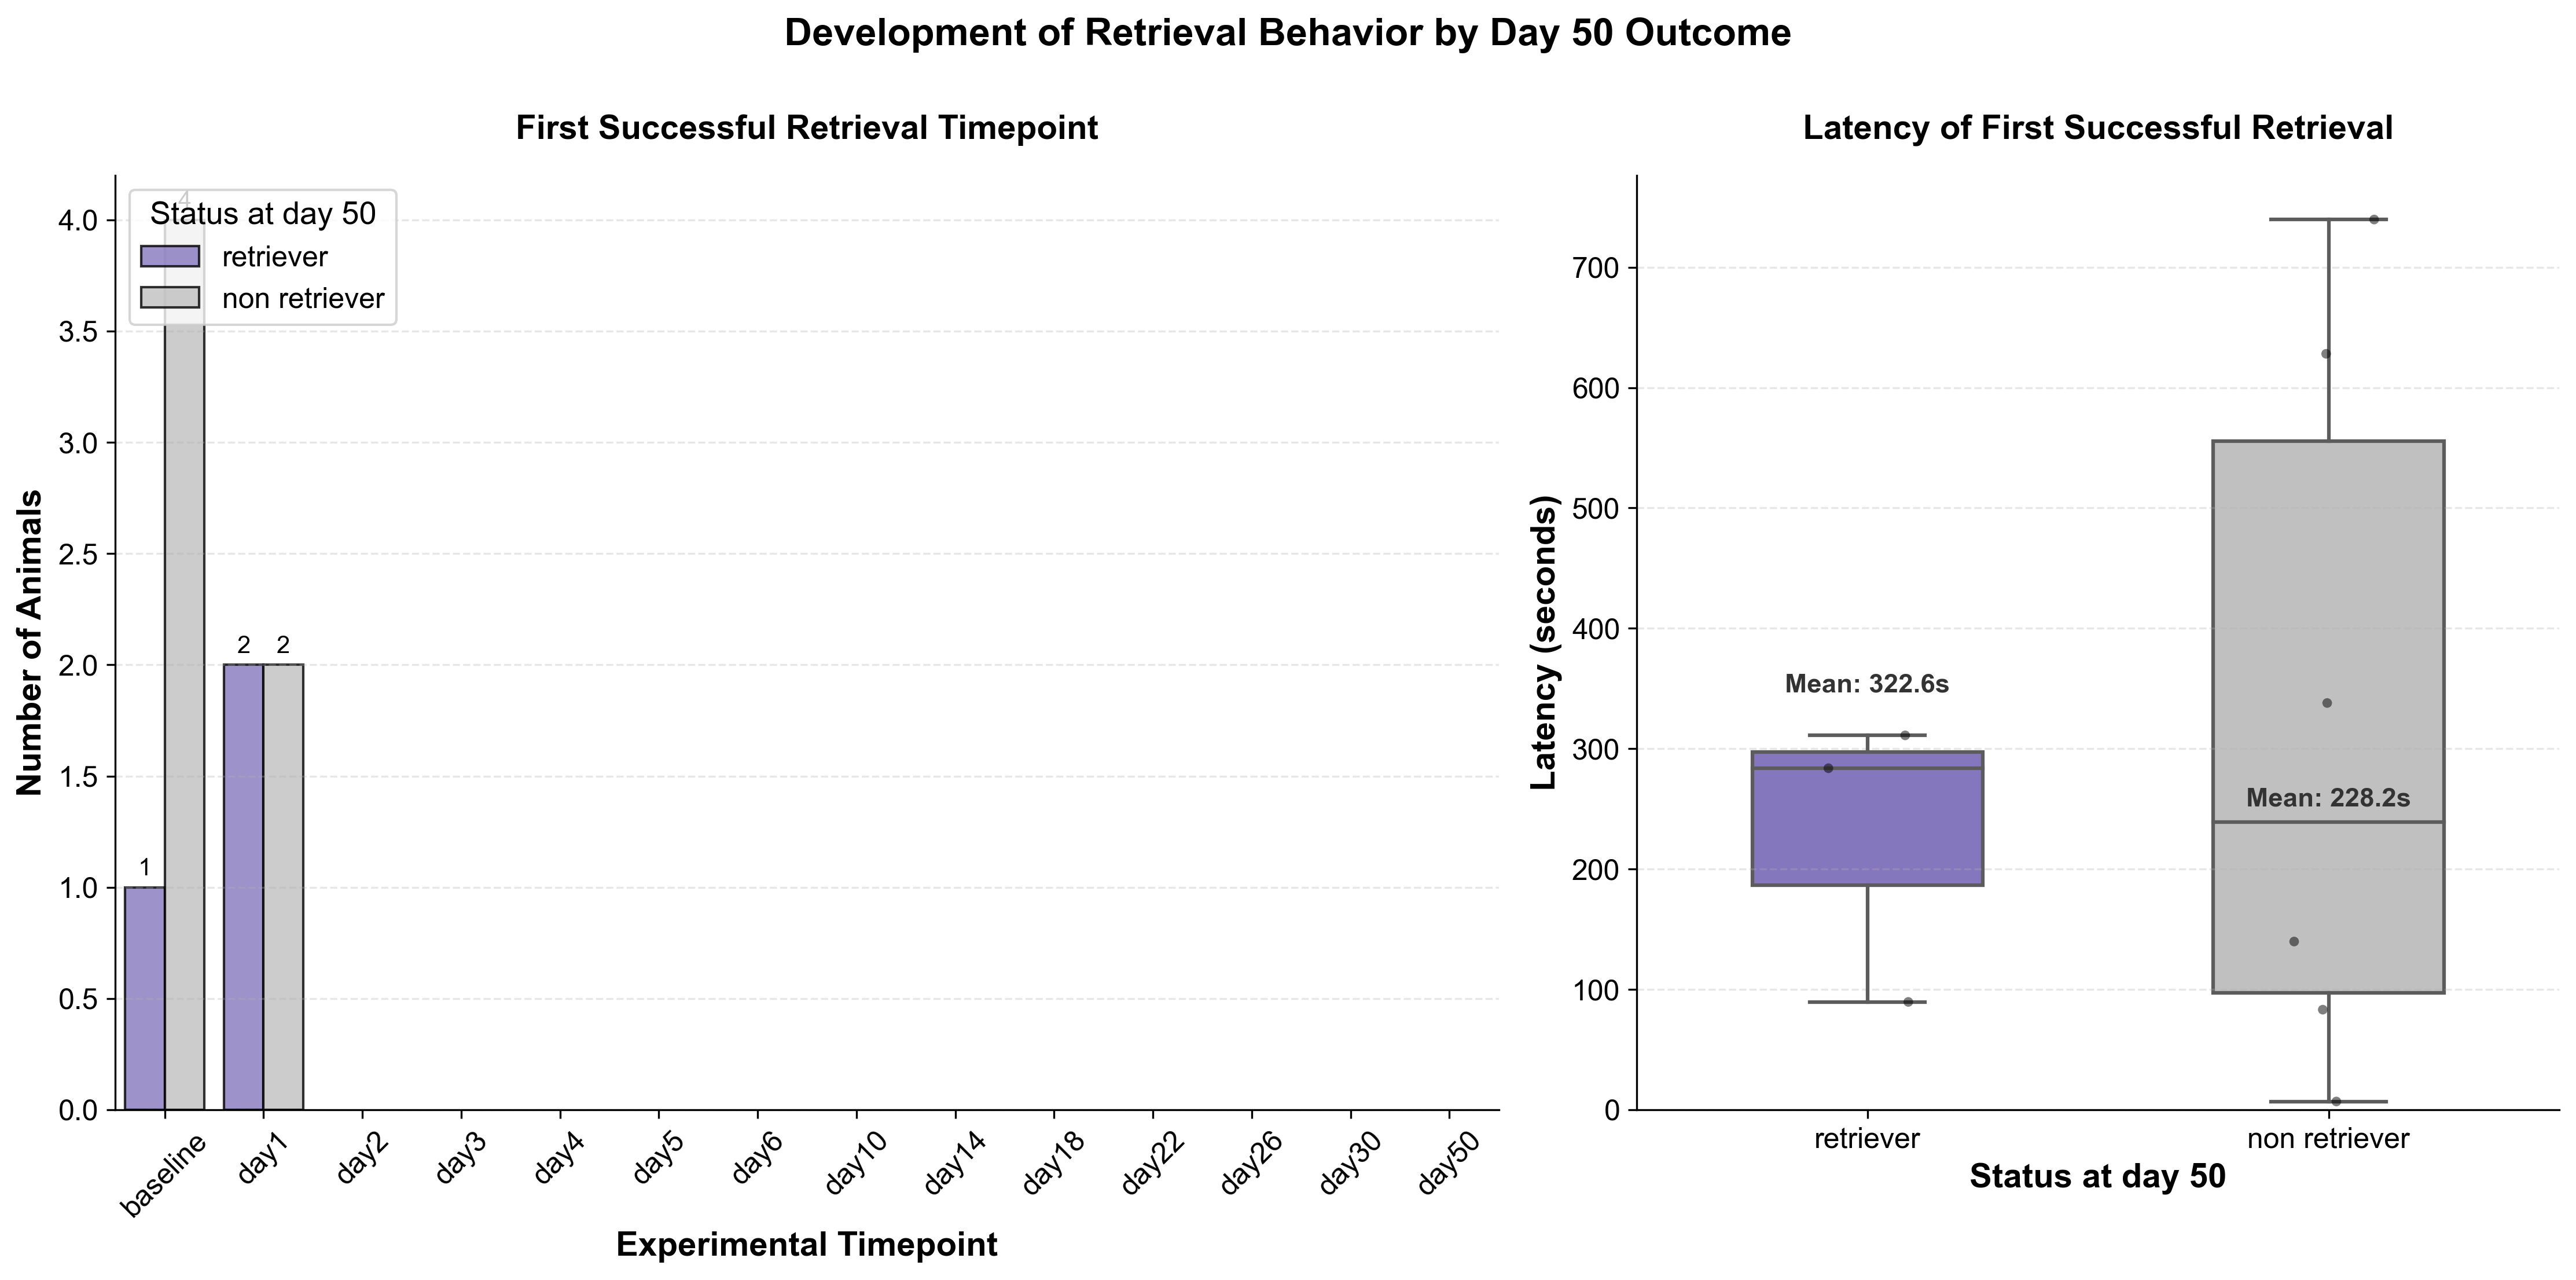

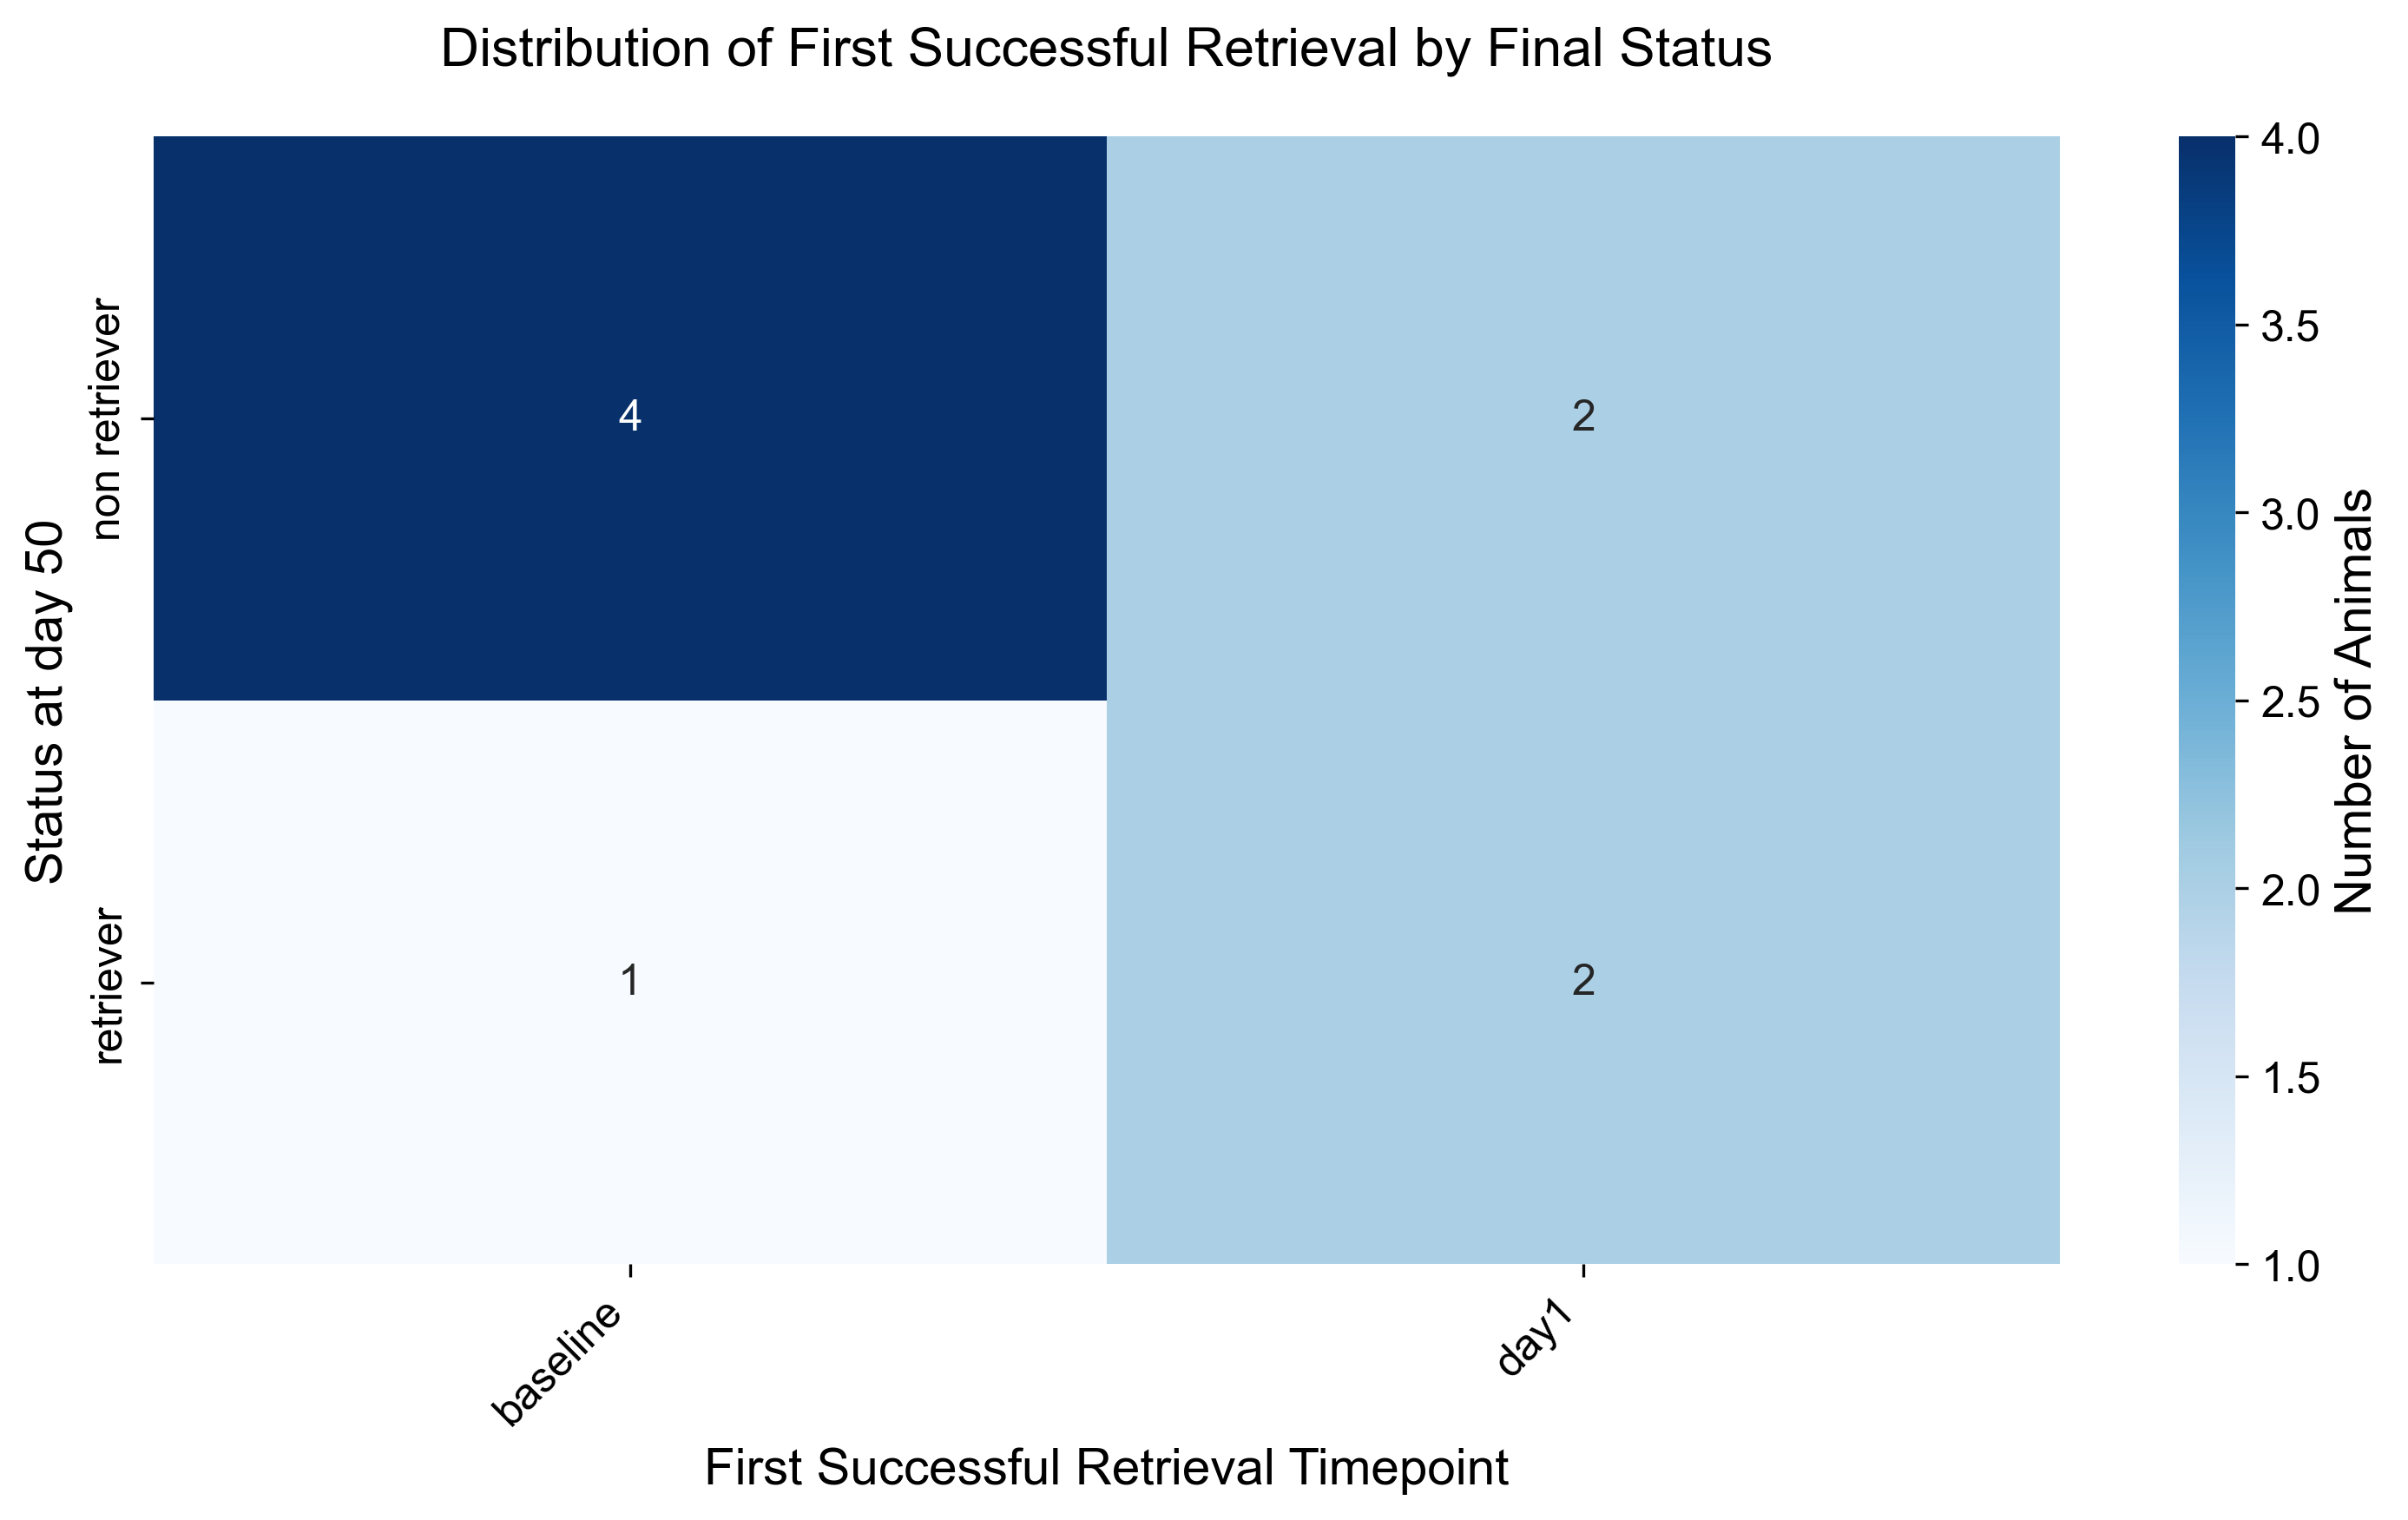

In [ ]:
# Create publication-quality visualization of earliest retrieval data
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib.ticker import MultipleLocator

# Set publication-ready styling
plt.rcParams.update({
    'font.family': 'Arial',
    'font.size': 12,
    'axes.titlesize': 14,
    'axes.labelsize': 14,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 12
})

# Ensure times are properly ordered for plotting
time_order = pd.CategoricalDtype(categories=times, ordered=True)
df_earliest_retrieval['earliest_retrieval'] = df_earliest_retrieval['earliest_retrieval'].astype(time_order)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7), gridspec_kw={'width_ratios': [1.5, 1]})

# 1. First subplot: Distribution of earliest retrieval timepoints
sns.countplot(data=df_earliest_retrieval, x='earliest_retrieval', hue='Retrievers at day50', 
              palette={'retriever': '#7E6BC9', 'non retriever': '#C0C0C0'},
              alpha=0.8, edgecolor='black', linewidth=1, ax=ax1)

ax1.set_title('First Successful Retrieval Timepoint', fontweight='bold', pad=15)
ax1.set_xlabel('Experimental Timepoint', fontweight='bold')
ax1.set_ylabel('Number of Animals', fontweight='bold')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(axis='y', linestyle='--', alpha=0.3)
ax1.legend(title='Status at day 50', title_fontsize=13)

# Add count annotations to the bars
for container in ax1.containers:
    ax1.bar_label(container, fmt='%d', fontsize=10, padding=3)

# 2. Second subplot: Latency comparison (boxplot with individual points)
sns.boxplot(data=df_earliest_retrieval, x='Retrievers at day50', y='latency',
            palette={'retriever': '#7E6BC9', 'non retriever': '#C0C0C0'},
            fliersize=0, width=0.5, ax=ax2)

# Add individual data points
sns.stripplot(data=df_earliest_retrieval, x='Retrievers at day50', y='latency',
              color='black', size=4, alpha=0.5, jitter=True, ax=ax2)

ax2.set_title('Latency of First Successful Retrieval', fontweight='bold', pad=15)
ax2.set_xlabel('Status at day 50', fontweight='bold')
ax2.set_ylabel('Latency (seconds)', fontweight='bold')
ax2.grid(axis='y', linestyle='--', alpha=0.3)

# Set y-axis to start at 0
ax2.set_ylim(0, ax2.get_ylim()[1])

# Calculate group means for latency
group_means = df_earliest_retrieval.groupby('Retrievers at day50')['latency'].mean()

# Add mean indicators to the boxplot
for i, (group, mean_val) in enumerate(group_means.items()):
    ax2.text(i, mean_val + 20, f'Mean: {mean_val:.1f}s', 
             ha='center', va='bottom', fontweight='bold', color='#333333', fontsize=11)

# Remove top and right spines
sns.despine(ax=ax1)
sns.despine(ax=ax2)

# Add main title
plt.suptitle('Development of Retrieval Behavior by Day 50 Outcome', fontsize=16, fontweight='bold', y=1.05)

# Adjust layout
plt.tight_layout()
fig.subplots_adjust(top=0.92)

# Save figure
plt.savefig('earliest_retrieval_analysis.png', dpi=300, bbox_inches='tight')
plt.savefig('earliest_retrieval_analysis.pdf', bbox_inches='tight')

plt.show()

# Create a heatmap showing earliest retrieval distribution
plt.figure(figsize=(10, 6))

# Create a cross-tabulation of the data
ct = pd.crosstab(df_earliest_retrieval['Retrievers at day50'], 
                 df_earliest_retrieval['earliest_retrieval'])

# Plot the heatmap
sns.heatmap(ct, cmap='Blues', annot=True, fmt='d', 
            cbar_kws={'label': 'Number of Animals'})

plt.title('Distribution of First Successful Retrieval by Final Status', fontsize=15, pad=20)
plt.xlabel('First Successful Retrieval Timepoint', fontsize=14)
plt.ylabel('Status at day 50', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.savefig('plots/earliest_retrieval_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

        time retrievers_day50  number_animals
0   baseline    non retriever              10
1   baseline        retriever               0
2       day1    non retriever              10
3       day1        retriever               0
4       day2    non retriever               7
5       day2        retriever               3
6       day3    non retriever               0
7       day3        retriever              10
8       day4    non retriever               0
9       day4        retriever              10
10      day5    non retriever               0
11      day5        retriever              10
12      day6    non retriever               2
13      day6        retriever               8
14     day10    non retriever              10
15     day10        retriever               0
16     day14    non retriever               2
17     day14        retriever               0
18     day18    non retriever               8
19     day18        retriever               0
20     day22    non retriever     

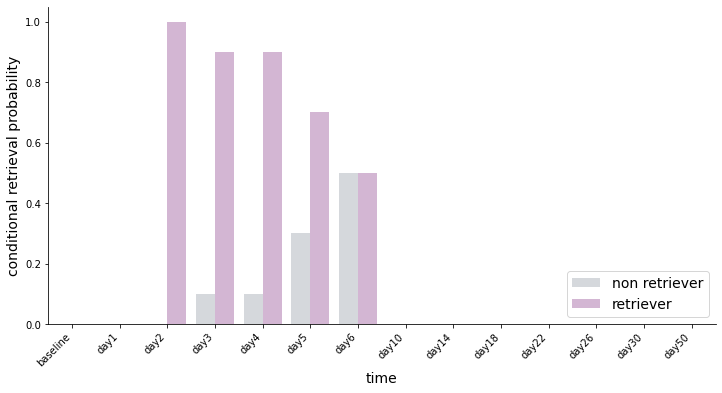

In [7]:
df = pd.read_csv('generated_dataset/behaviours_df.csv')

df.loc[df.ID.isin(ids_retrievers), 'retrievers_day50'] = 'retriever'
df.loc[df.ID.isin(ids_non_retrievers), 'retrievers_day50'] = 'non retriever'

df = df[df.behaviour == 'retrieval to nest'].reset_index()
df['retriever_status'] = np.where(df['latency'] < 900, 'retriever', 'non retriever')
df.time = pd.Categorical(df.time, times).sort_values()

number_retrievers = df.groupby([ 'time', 'retrievers_day50', 'retriever_status']).size().reset_index().rename(columns={0:'number_retrievers'})
number_animals = df.groupby(['time', 'retrievers_day50']).size().reset_index().rename(columns={0: 'number_animals'})

df_probability = pd.merge(number_retrievers, number_animals, on = ['time', 'retrievers_day50'])
df_probability['probability'] = df_probability['number_retrievers']/df_probability['number_animals']

print(number_animals)

# Plot probability of retrieval
fig, ax = plt.subplots(figsize = [10,5])
fig.tight_layout()
sns.barplot(x = "time", y = "probability", hue = 'retriever_status', data = df_probability[df_probability['retrievers_day50'] == 'retriever'], palette = ["slategrey", "purple"], alpha = 0.3)
plt.ylabel('conditional retrieval probability', fontsize = 14)
plt.xlabel('time', fontsize = 14)
plt.xticks(rotation=45, ha = 'right')
plt.legend(loc='lower right', fontsize = 14)
# plt.title('Probability of retrieval')
sns.despine()


Mice that retrieved at baseline: 6
Of those, mice that retrieved at day 50: 1
Conditional probability P(retrieval at day50 | retrieval at baseline): 0.17


/var/folders/4g/5slcnh6x71lgn2r91zbk1pwr0000gn/T/ipykernel_82381/4053104328.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_times['retrieved'] = np.where(df_times['latency'] < 900, 1, 0)


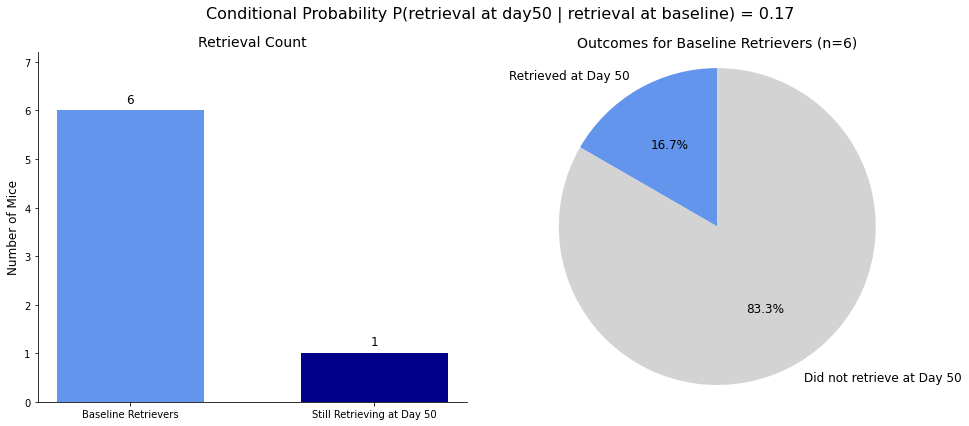

In [9]:
# Load data if not already loaded
df = pd.read_csv('generated_dataset/behaviours_df.csv')

# Filter for retrieval to nest behavior
df_retrieval = df[df['behaviour'] == 'retrieval to nest']

# Filter for baseline and day50 time points
df_times = df_retrieval[df_retrieval['time'].isin(['baseline', 'day50'])]

# Create success indicator (1 = retrieved, 0 = didn't retrieve)
df_times['retrieved'] = np.where(df_times['latency'] < 900, 1, 0)

# Get IDs of baseline retrievers
baseline_retrievers = df_times[(df_times['time'] == 'baseline') & 
                              (df_times['retrieved'] == 1)]['ID'].unique()

# Count baseline retrievers
n_baseline_retrievers = len(baseline_retrievers)

# Get data for these mice at day50
day50_data = df_times[(df_times['time'] == 'day50') & 
                      (df_times['ID'].isin(baseline_retrievers))]

# Count successful retrievals at day50 among baseline retrievers
n_retrieved_day50 = day50_data['retrieved'].sum()

# Calculate conditional probability
cond_prob = n_retrieved_day50 / n_baseline_retrievers

print(f"Mice that retrieved at baseline: {n_baseline_retrievers}")
print(f"Of those, mice that retrieved at day 50: {n_retrieved_day50}")
print(f"Conditional probability P(retrieval at day50 | retrieval at baseline): {cond_prob:.2f}")

# Create visualization of retrieval persistence
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Bar plot on the left
bars = ax1.bar(['Baseline Retrievers', 'Still Retrieving at Day 50'], 
        [n_baseline_retrievers, n_retrieved_day50],
        color=['cornflowerblue', 'darkblue'], width=0.6)

# Add count labels on top of bars
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.1,
            f'{int(height)}', ha='center', va='bottom', fontsize=12)

ax1.set_ylim(0, max(n_baseline_retrievers, n_retrieved_day50) * 1.2)
ax1.set_ylabel('Number of Mice', fontsize=12)
ax1.set_title('Retrieval Count', fontsize=14)

# Pie chart on the right
labels = ['Retrieved at Day 50', 'Did not retrieve at Day 50']
sizes = [n_retrieved_day50, n_baseline_retrievers - n_retrieved_day50]
colors = ['cornflowerblue', 'lightgray']

ax2.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, textprops={'fontsize': 12})
ax2.axis('equal')
ax2.set_title(f'Outcomes for Baseline Retrievers (n={n_baseline_retrievers})', fontsize=14)

plt.suptitle(f'Conditional Probability P(retrieval at day50 | retrieval at baseline) = {cond_prob:.2f}', 
             fontsize=16)

sns.despine(ax=ax1)
plt.tight_layout()
plt.show()

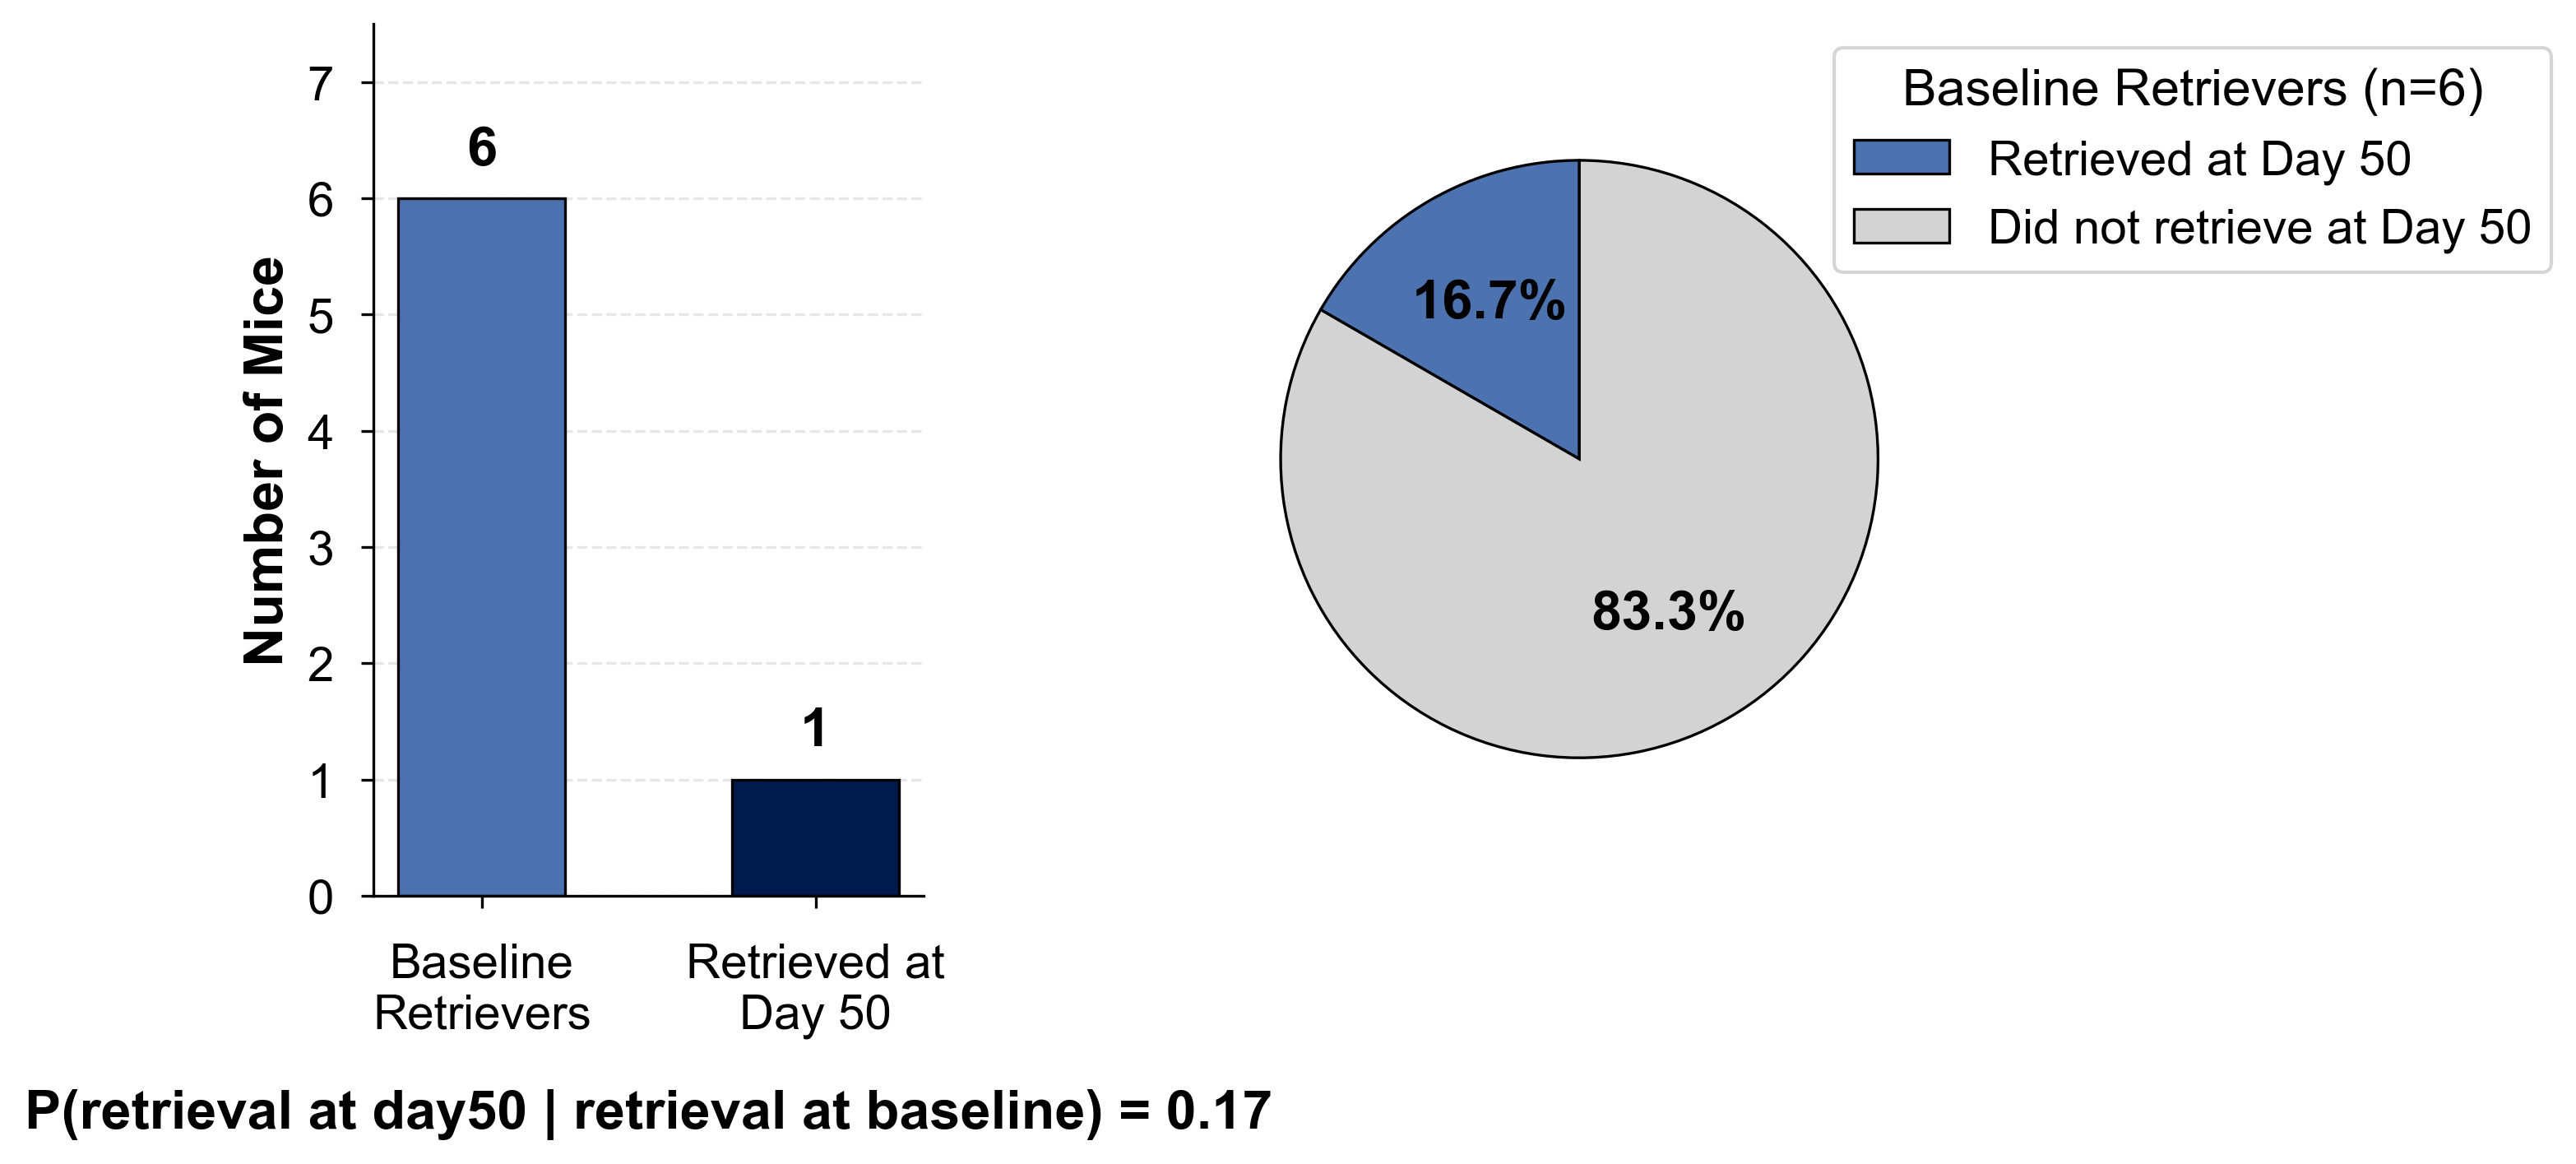

In [18]:
# Publication-ready visualization of retrieval persistence with compact design
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set publication-ready styling with larger fonts
plt.rcParams.update({
    'font.family': 'Arial',
    'font.size': 14,          # Increased base font size
    'axes.titlesize': 16,     # Increased title font size
    'axes.labelsize': 16,     # Increased axes labels font size
    'xtick.labelsize': 14,    # Increased tick labels size
    'ytick.labelsize': 14,
    'legend.fontsize': 14,
    'figure.titlesize': 18    # Increased figure title size
})

# Create a more compact figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5), gridspec_kw={'width_ratios': [1, 1.2]})

# Enhanced bar plot on the left
bars = ax1.bar(['Baseline\nRetrievers', 'Retrieved at\nDay 50'], 
        [n_baseline_retrievers, n_retrieved_day50],
        color=['#4C72B0', '#001A4D'], 
        width=0.5, 
        edgecolor='black', 
        linewidth=0.8)

# Add count labels with larger font
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.2,
            f'{int(height)}', ha='center', va='bottom', fontsize=16, fontweight='bold')

# Improve y-axis
ax1.set_ylim(0, max(n_baseline_retrievers, n_retrieved_day50) * 1.25)
ax1.set_ylabel('Number of Mice', fontweight='bold')
ax1.tick_params(axis='y', which='major', pad=8)
ax1.tick_params(axis='x', which='major', pad=10)

# Add subtle grid lines
ax1.yaxis.grid(True, linestyle='--', alpha=0.3)
ax1.set_axisbelow(True)

# Enhanced pie chart
wedges, texts, autotexts = ax2.pie(
    sizes, 
    labels=None,  # We'll add custom legend instead
    autopct='%1.1f%%', 
    startangle=90, 
    colors=['#4C72B0', '#D3D3D3'],
    wedgeprops={'edgecolor': 'black', 'linewidth': 0.8},
    textprops={'fontsize': 16, 'fontweight': 'bold'}
)

# Add legend instead of direct labels for better placement
ax2.legend(
    wedges, 
    labels,
    title=f'Baseline Retrievers (n={n_baseline_retrievers})',
    loc="upper left",
    bbox_to_anchor=(0.85, 0, 0.5, 1),
    fontsize=14,
    title_fontsize=15
)

ax2.axis('equal')

# Add the conditional probability as a text annotation instead of title
ax1.text(0.5, -0.25, 
         f'P(retrieval at day50 | retrieval at baseline) = {cond_prob:.2f}',
         ha='center', va='center', fontsize=16, fontweight='bold', 
         transform=ax1.transAxes)

# Remove spines
sns.despine(ax=ax1)

# Ensure proper spacing
plt.tight_layout(w_pad=2)  # Increase width padding between subplots

# Save in publication-quality formats
plt.savefig('plots/retrieval_persistence.pdf', dpi=600, bbox_inches='tight')
plt.savefig('plots/retrieval_persistence.png', dpi=600, bbox_inches='tight')

plt.show()

/var/folders/4g/5slcnh6x71lgn2r91zbk1pwr0000gn/T/ipykernel_82381/4290426666.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_times['retrieved'] = np.where(df_times['latency'] < 900, 1, 0)
/var/folders/4g/5slcnh6x71lgn2r91zbk1pwr0000gn/T/ipykernel_82381/4290426666.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_times['retrieved'] = np.where(df_times['latency'] < 900, 1, 0)
/var/folders/4g/5slcnh6x71lgn2r91zbk1pwr0000gn/T/ipykernel_82381/4290426666.py:14: SettingWithCopyWarning: 
A value is try

Mice that retrieved at baseline: 6
Of those, mice that retrieved at day 10: 3
Conditional probability P(retrieval at day10 | retrieval at baseline): 0.50

Mice that retrieved at day 10: 6
Of those, mice that retrieved at day 50: 2
Conditional probability P(retrieval at day50 | retrieval at day10): 0.33

Direct conditional probability P(retrieval at day50 | retrieval at baseline): 0.17


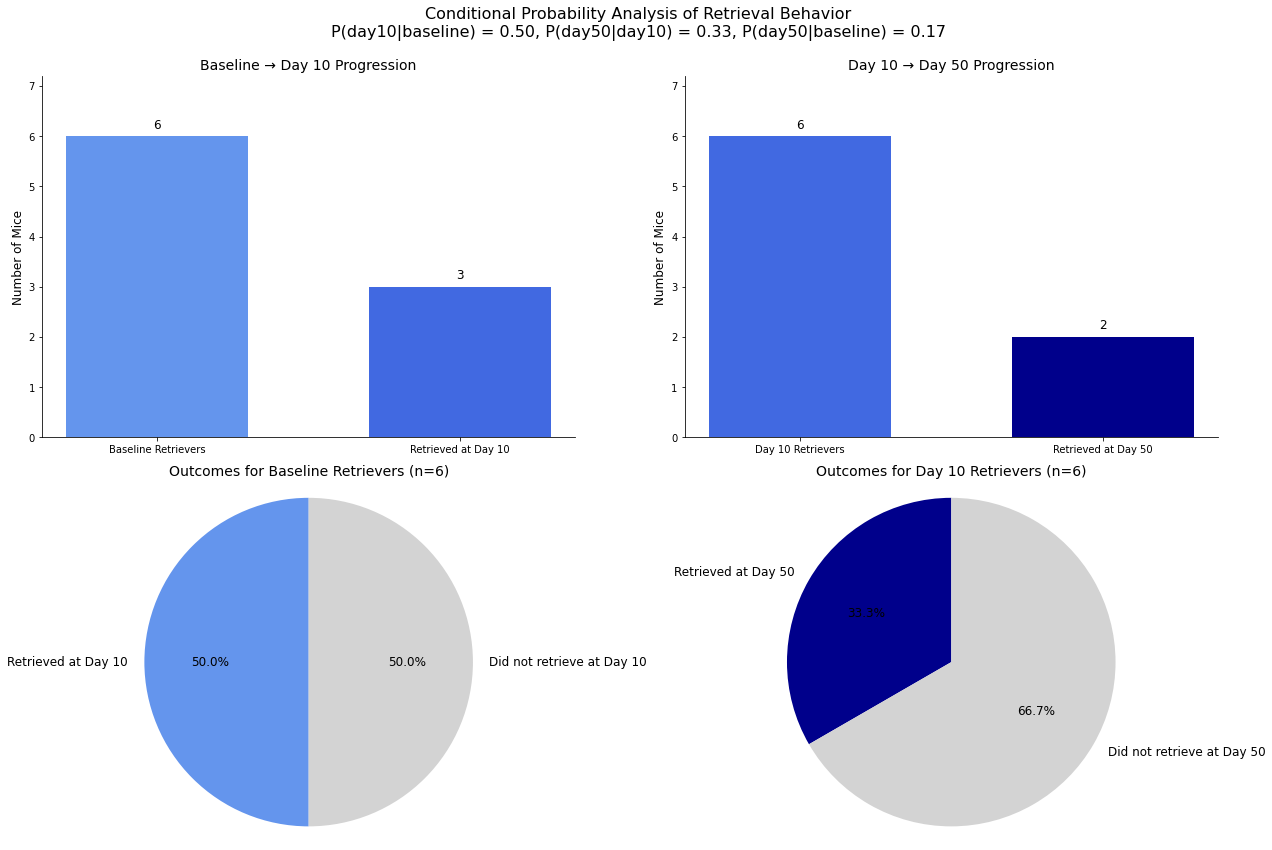

In [10]:
# Load data
df = pd.read_csv('generated_dataset/behaviours_df.csv')

# Filter for retrieval to nest behavior
df_retrieval = df[df['behaviour'] == 'retrieval to nest']

# Create a function to calculate conditional probabilities between any two time points
def calc_conditional_prob(df, time1, time2):
    """Calculate probability of retrieving at time2 given retrieval at time1"""
    # Filter for the two time points
    df_times = df[df['time'].isin([time1, time2])]
    
    # Create success indicator (1 = retrieved, 0 = didn't retrieve)
    df_times['retrieved'] = np.where(df_times['latency'] < 900, 1, 0)
    
    # Get IDs of time1 retrievers
    time1_retrievers = df_times[(df_times['time'] == time1) & 
                              (df_times['retrieved'] == 1)]['ID'].unique()
    
    # Count time1 retrievers
    n_time1_retrievers = len(time1_retrievers)
    
    if n_time1_retrievers == 0:
        return 0, 0, 0  # Avoid division by zero
    
    # Get data for these mice at time2
    time2_data = df_times[(df_times['time'] == time2) & 
                        (df_times['ID'].isin(time1_retrievers))]
    
    # Count successful retrievals at time2 among time1 retrievers
    n_retrieved_time2 = time2_data['retrieved'].sum()
    
    # Calculate conditional probability
    cond_prob = n_retrieved_time2 / n_time1_retrievers
    
    return cond_prob, n_time1_retrievers, n_retrieved_time2

# Calculate the three conditional probabilities
baseline_day10_prob, n_baseline_retrievers, n_day10_from_baseline = calc_conditional_prob(
    df_retrieval, 'baseline', 'day10')

day10_day50_prob, n_day10_retrievers, n_day50_from_day10 = calc_conditional_prob(
    df_retrieval, 'day10', 'day50')

baseline_day50_prob, _, n_day50_from_baseline = calc_conditional_prob(
    df_retrieval, 'baseline', 'day50')

# Print results
print(f"Mice that retrieved at baseline: {n_baseline_retrievers}")
print(f"Of those, mice that retrieved at day 10: {n_day10_from_baseline}")
print(f"Conditional probability P(retrieval at day10 | retrieval at baseline): {baseline_day10_prob:.2f}")
print()
print(f"Mice that retrieved at day 10: {n_day10_retrievers}")
print(f"Of those, mice that retrieved at day 50: {n_day50_from_day10}")
print(f"Conditional probability P(retrieval at day50 | retrieval at day10): {day10_day50_prob:.2f}")
print()
print(f"Direct conditional probability P(retrieval at day50 | retrieval at baseline): {baseline_day50_prob:.2f}")

# Create a combined visualization
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Plot 1: Baseline -> Day 10
bars1 = axes[0, 0].bar(['Baseline Retrievers', 'Retrieved at Day 10'], 
        [n_baseline_retrievers, n_day10_from_baseline],
        color=['cornflowerblue', 'royalblue'], width=0.6)

for bar in bars1:
    height = bar.get_height()
    axes[0, 0].text(bar.get_x() + bar.get_width()/2., height + 0.1,
            f'{int(height)}', ha='center', va='bottom', fontsize=12)

axes[0, 0].set_ylim(0, max(n_baseline_retrievers, n_day10_from_baseline) * 1.2)
axes[0, 0].set_ylabel('Number of Mice', fontsize=12)
axes[0, 0].set_title('Baseline → Day 10 Progression', fontsize=14)

# Plot 2: Day 10 -> Day 50
bars2 = axes[0, 1].bar(['Day 10 Retrievers', 'Retrieved at Day 50'], 
        [n_day10_retrievers, n_day50_from_day10],
        color=['royalblue', 'darkblue'], width=0.6)

for bar in bars2:
    height = bar.get_height()
    axes[0, 1].text(bar.get_x() + bar.get_width()/2., height + 0.1,
            f'{int(height)}', ha='center', va='bottom', fontsize=12)

axes[0, 1].set_ylim(0, max(n_day10_retrievers, n_day50_from_day10) * 1.2)
axes[0, 1].set_ylabel('Number of Mice', fontsize=12)
axes[0, 1].set_title('Day 10 → Day 50 Progression', fontsize=14)

# Pie chart 1: Baseline -> Day 10
labels1 = ['Retrieved at Day 10', 'Did not retrieve at Day 10']
sizes1 = [n_day10_from_baseline, n_baseline_retrievers - n_day10_from_baseline]
axes[1, 0].pie(sizes1, labels=labels1, autopct='%1.1f%%', startangle=90, 
        colors=['cornflowerblue', 'lightgray'], textprops={'fontsize': 12})
axes[1, 0].axis('equal')
axes[1, 0].set_title(f'Outcomes for Baseline Retrievers (n={n_baseline_retrievers})', fontsize=14)

# Pie chart 2: Day 10 -> Day 50
labels2 = ['Retrieved at Day 50', 'Did not retrieve at Day 50']
sizes2 = [n_day50_from_day10, n_day10_retrievers - n_day50_from_day10]
axes[1, 1].pie(sizes2, labels=labels2, autopct='%1.1f%%', startangle=90,
        colors=['darkblue', 'lightgray'], textprops={'fontsize': 12})
axes[1, 1].axis('equal')
axes[1, 1].set_title(f'Outcomes for Day 10 Retrievers (n={n_day10_retrievers})', fontsize=14)

# Add overall title
plt.suptitle('Conditional Probability Analysis of Retrieval Behavior\n' + 
             f'P(day10|baseline) = {baseline_day10_prob:.2f}, ' +
             f'P(day50|day10) = {day10_day50_prob:.2f}, ' +
             f'P(day50|baseline) = {baseline_day50_prob:.2f}', 
             fontsize=16)

# Final formatting
for ax in axes[0, :]:
    sns.despine(ax=ax)

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()